In [1]:
# Dependencies
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests
from config import crimekey
from config import censuskey
from pprint import pprint
from census import Census

# API Setup
baseurl = "http://api.usa.gov/crime/fbi/sapi/"
c = Census(censuskey, year=2019)

In [2]:
URL = ("https://api.usa.gov/crime/fbi/sapi/api/summarized/state/AL/violent-crime/2019/2019?API_KEY=" + crimekey)

getdatasets = requests.get(URL)
datasets_json = getdatasets.json()
# pprint(datasets_json)

{'pagination': {'count': 352, 'page': 0, 'pages': 18, 'per_page': 20},
 'results': [{'actual': 209,
              'cleared': 62,
              'data_range': None,
              'data_year': 2019,
              'offense': 'violent-crime',
              'ori': 'AL0010000',
              'state_abbr': 'AL'},
             {'actual': 383,
              'cleared': 3,
              'data_range': None,
              'data_year': 2019,
              'offense': 'violent-crime',
              'ori': 'AL0010100',
              'state_abbr': 'AL'},
             {'actual': 0,
              'cleared': 0,
              'data_range': None,
              'data_year': 2019,
              'offense': 'violent-crime',
              'ori': 'AL0010300',
              'state_abbr': 'AL'},
             {'actual': 122,
              'cleared': 18,
              'data_range': None,
              'data_year': 2019,
              'offense': 'violent-crime',
              'ori': 'AL0010400',
              'state_abb

In [6]:
# Find crime rate for each state
stateAbbs = ['AL', 'AK', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS',
            'KY', 'LA', 'MA', 'ME', 'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 
            'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
statedict = {}
record = 1

# loop through all states and pull data for each
for item in stateAbbs:
    query_url = "https://api.usa.gov/crime/fbi/sapi/api/summarized/state/" + item + "/violent-crime/2019/2019?API_KEY=" + crimekey
    # Get response into JSON
    stateresponse = requests.get(query_url)
    statejson = stateresponse.json()
    x = len(statejson['results'])
    # Log each state and account for exceptions
    try:
        # Collect crime data and put it into a dictionary
        actuals = 0
        for i in range(x):
            actuals = actuals + statejson['results'][i]['actual']
            statedict[item] = [actuals]
        print(f"Processing record {record} | {item}")
        record += 1
        
            
    # Exception if state data isn't found
    except:
        print(f"Data not found for {item}. Skipping...")

print("----------Job complete!----------")
    

Processing record 1 | AL
Processing record 2 | AK
Processing record 3 | AR
Processing record 4 | AZ
Processing record 5 | CA
Processing record 6 | CO
Processing record 7 | CT
Processing record 8 | DE
Processing record 9 | DC
Processing record 10 | FL
Processing record 11 | GA
Processing record 12 | HI
Processing record 13 | ID
Processing record 14 | IL
Processing record 15 | IN
Processing record 16 | IA
Processing record 17 | KS
Processing record 18 | KY
Processing record 19 | LA
Processing record 20 | MA
Processing record 21 | ME
Processing record 22 | MD
Processing record 23 | MI
Processing record 24 | MN
Processing record 25 | MO
Processing record 26 | MS
Processing record 27 | MT
Processing record 28 | NC
Processing record 29 | ND
Processing record 30 | NE
Processing record 31 | NH
Processing record 32 | NJ
Processing record 33 | NM
Processing record 34 | NV
Processing record 35 | NY
Processing record 36 | OH
Processing record 37 | OK
Processing record 38 | OR
Processing record 39 

In [10]:
# Convert the dictionary into a dataframe
statedf = pd.DataFrame.from_dict(statedict, orient='index')
statedf

,0
AL,1208
AK,4742
AR,1069
AZ,3379
CA,9734
CO,5198
CT,1293
DE,1417
DC,7403
FL,2662


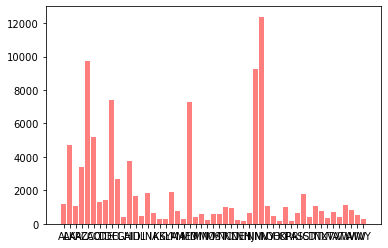

<Figure size 288x7200 with 0 Axes>

In [34]:
plt.bar(stateAbbs, statedf[0], color='r', alpha=0.5, align="center")
plt.figure(figsize=(4,100))
plt.show()

In [39]:
# Merge state names and abbreviations to match to Census data

stateNames = {
  "AL" : "Alabama",
  "AK" : "Alaska",
  "AZ" : "Arizona",
  "AR" : "Arkansas",
  "CA" : "California",
  "CO" : "Colorado",
  "CT" : "Connecticut",
  "DE" : "Delaware",
  "FL" : "Florida",
  "GA" : "Georgia",
  "HI" : "Hawaii",
  "ID" : "Idaho",
  "IL" : "Illinois",
  "IN" : "Indiana",
  "IA" : "Iowa",
  "KS" : "Kansas",
  "KY" : "Kentucky",
  "LA" : "Louisiana",
  "ME" : "Maine",
  "MD" : "Maryland",
  "MA" : "Massachusetts",
  "MI" : "Michigan",
  "MN" : "Minnesota",
  "MS" : "Mississippi",
  "MO" : "Missouri",
  "MT" : "Montana",
  "NE" : "Nebraska",
  "NV" : "Nevada",
  "NH" : "New Hampshire",
  "NJ" : "New Jersey",
  "NM" : "New Mexico",
  "NY" : "New York",
  "NC" : "North Carolina",
  "ND" : "North Dakota",
  "OH" : "Ohio",
  "OK" : "Oklahoma",
  "OR" : "Oregon",
  "PA" : "Pennsylvania",
  "RI" : "Rhode Island",
  "SC" : "South Carolina",
  "SD" : "South Dakota",
  "TN" : "Tennessee",
  "TX" : "Texas",
  "UT" : "Utah",
  "VT" : "Vermont",
  "VA" : "Virginia",
  "WA" : "Washington",
  "WV" : "West Virginia",
  "WI" : "Wisconsin",
  "WY" : "Wyoming",
  "DC" : "District of Columbia"
}

stateNamedf = pd.DataFrame.from_dict(stateNames, orient='index')
stateNamedf

,0
AL,Alabama
AK,Alaska
AZ,Arizona
AR,Arkansas
CA,California
CO,Colorado
CT,Connecticut
DE,Delaware
FL,Florida
GA,Georgia


In [35]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]

census_pd.head()

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,01,Alabama,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,2.708946
1,02,Alaska,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,3.637114
2,04,Arizona,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,2.778676
3,05,Arkansas,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,2.349860
4,06,California,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,3.052765
